analyze NCI cervical cnv results

In [1]:
# import csv
import matplotlib
# import seaborn
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from scipy.stats import ttest_ind
# import scipy.stats as stats
# import scipy.stats as ss
# from matplotlib import style
# import matplotlib.gridspec as gridspec
# import matplotlib.patches as patches
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6, 4)


# from sklearn.decomposition import RandomizedPCA, PCA, TruncatedSVD
# from sklearn.linear_moamp import LogisticRegression
# from sklearn.manifold import TSNE
# from sklearn.preprocessing import StandardScaler

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# produce list of amplied and deleted regions with oncogenes

In [2]:
def map_two_columns(x1, x2):
    if 'q' in x1 or 'p' in x1:
        return x1
    elif 'q' in x2 or 'p' in x2:
        return x2
    else:
        return 'error'
    

In [4]:
# for amps
# pos_amp_file = '/home/szong/bin/GISTIC_2_0_22/124_patient_adj_hiv_pos/amp_genes.conf_99.txt.summary.sorted'
pos_amp_file = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/124_patient_adj_hiv_pos/amp_genes.conf_99.txt.summary.sorted'
pos_amps = pd.read_csv(pos_amp_file, sep='\t')
pos_amps.columns = ['cytoband', 'q_value', 'residual_q_value', 'chrom', 'wide_peak_boundary',
       'genes_in_wide_peak', 'oncogenes', 'num_genes']
# pos_amps = pd.read_csv(pos_amp_file, sep='\t')
pos_amps.head(2)

# neg_amp_file = '/home/szong/bin/GISTIC_2_0_22/124_patient_adj_hiv_neg/amp_genes.conf_99.txt.summary.sorted'
neg_amp_file = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/124_patient_adj_hiv_neg/amp_genes.conf_99.txt.summary.sorted'
neg_amps = pd.read_csv(neg_amp_file, sep='\t')
neg_amps.columns = ['cytoband', 'q_value', 'residual_q_value', 'chrom', 'wide_peak_boundary',
       'genes_in_wide_peak', 'oncogenes', 'num_genes']
# neg_amps = pd.read_csv(neg_amp_file, sep='\t')
neg_amps.head(2)

ndf = pd.merge(pos_amps, neg_amps, left_on='cytoband', right_on='cytoband', how='outer')#.fillna(1)
# ndf.columns = ['hiv+q', 'cytoband','hiv+num_genes', 'hiv+oncogenes', 'hiv-q', 'hiv-num_genes','hiv-oncogenes']
# ndf['cytoband'] = ndf.astype(str).apply(lambda x: map_two_columns(x1=x['cytoband_pos'], x2=x['cytoband_neg']), axis=1)

# ndf = ndf.drop(['cytoband_pos', 'cytoband_neg'], axis=1)
ndf.head(2)

,cytoband,q_value,residual_q_value,chrom,wide_peak_boundary,genes_in_wide_peak,oncogenes,num_genes
0,1p11.2,5.902500e-07,0.000017,1,121477300-121481773,NaN,NaN,0
1,1p31.3,1.501600e-04,0.000634,1,61877446-62693351,"INADL,NFIA,hsa-mir-3116-2,TM2D1,L1TD1",NaN,5


,cytoband,q_value,residual_q_value,chrom,wide_peak_boundary,genes_in_wide_peak,oncogenes,num_genes
0,1p22.3,3.097100e-02,3.097100e-02,1,85979990-86005957,DDAH1,NaN,1
1,1q21.3,3.130900e-08,3.130900e-08,1,153976314-154123522,NUP210L,NaN,1


,cytoband,q_value_x,residual_q_value_x,chrom_x,wide_peak_boundary_x,genes_in_wide_peak_x,oncogenes_x,num_genes_x,q_value_y,residual_q_value_y,chrom_y,wide_peak_boundary_y,genes_in_wide_peak_y,oncogenes_y,num_genes_y
0,1p11.2,5.902500e-07,0.000017,1.0,121477300-121481773,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1p31.3,1.501600e-04,0.000634,1.0,61877446-62693351,"INADL,NFIA,hsa-mir-3116-2,TM2D1,L1TD1",NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# ndf[ndf.cytoband == '5p11']

In [6]:
new_cols = pd.Series(ndf.columns.tolist()).str.replace('_x', '_hiv+').str.replace('_y', '_hiv-')

ndf.columns = new_cols

ndf.head(2)

In [9]:
# find duplicated cytobands
# pd.concat([g for _,g in ndf.groupby('cytoband') if len(g)>1])

In [10]:
ndf = ndf.drop_duplicates(subset='cytoband', keep='last')

In [11]:
# of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/amp_cytoband_qvalue_comparison_hiv_pos_vs_neg.txt'
# ndf.to_csv(of, sep='\t', index=False)

In [12]:
ndf.shape
ndf['cytoband'].nunique()

(71, 15)

71

In [13]:
# ndf = ndf.drop_duplicates(subset='cytoband', keep='last')
# ndf = ndf.fillna(1)

In [14]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    k = 0
    j = 0 
    for i, point in a.iterrows():
        _ = ax.text(point['x']+j, point['y']+k, str(point['val']))
#         k+=.2
#         j+=.2
    return a

In [15]:
ndf['q_value_hiv+'] = ndf['q_value_hiv+'].fillna(1)
ndf['q_value_hiv-'] = ndf['q_value_hiv-'].fillna(1)
ndf['num_genes_hiv+'] = ndf['num_genes_hiv+'].fillna(0).astype(int)
ndf['num_genes_hiv-'] = ndf['num_genes_hiv-'].fillna(0).astype(int)
ndf['oncogenes_hiv+'] = ndf['oncogenes_hiv+'].fillna('None')
ndf['oncogenes_hiv-'] = ndf['oncogenes_hiv-'].fillna('None')


In [16]:
# of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/amp_gene_qvalue_comparison_hiv_pos_vs_neg.txt'
# ndf = pd.read_csv(of, sep='\t').fillna(1)
# ndf.head(2)

In [17]:
ndf['hiv+q(-log10)'] = -np.log10(ndf['q_value_hiv+'])
ndf['hiv-q(-log10)'] = -np.log10(ndf['q_value_hiv-'])

In [18]:
ndf.head(2)

ndf.shape

,cytoband,q_value_hiv+,residual_q_value_hiv+,chrom_hiv+,wide_peak_boundary_hiv+,genes_in_wide_peak_hiv+,oncogenes_hiv+,num_genes_hiv+,q_value_hiv-,residual_q_value_hiv-,chrom_hiv-,wide_peak_boundary_hiv-,genes_in_wide_peak_hiv-,oncogenes_hiv-,num_genes_hiv-,hiv+q(-log10),hiv-q(-log10)
0,1p11.2,5.902500e-07,0.000017,1.0,121477300-121481773,NaN,None,0,1.0,NaN,NaN,NaN,NaN,None,0,6.228964,-0.0
1,1p31.3,1.501600e-04,0.000634,1.0,61877446-62693351,"INADL,NFIA,hsa-mir-3116-2,TM2D1,L1TD1",None,5,1.0,NaN,NaN,NaN,NaN,None,0,3.823446,-0.0


(71, 17)

In [19]:
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/amp_cytoband_qvalue_comparison_hiv_pos_vs_neg.txt'
# ndf.to_csv(of, sep='\t', index=False)

In [20]:
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/amp_cytoband_labels.csv'
# points.sort_values(['x', 'y']).to_csv(of, sep='\t', index=False)
points = pd.read_csv(of, sep='\t')

Text(0.5,1,'GISTIC amps cytobands')

(-1, 23)

(-1, 23)

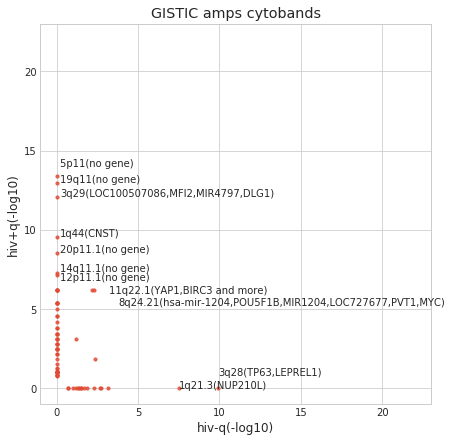

In [21]:
# Set theme
sns.set_style('whitegrid')


# Scatterplot arguments
# grid = sns.lmplot(x='hiv+q', y='hiv-q', data=ndf.fillna(.1),
#            fit_reg=False) # No regression line
#            #hue='Stage')   # Color by evolution stage
# # Tweak using Matplotlib
# # plt.ylim(0, .2)
# # plt.xlim(0, .2)
# grid.set(xscale="log", yscale="log")

f, ax = plt.subplots(figsize=(7, 7))


# ax.set(xscale="log", yscale="log")
sns.regplot(y='hiv+q(-log10)', x='hiv-q(-log10)', data=ndf, ax=ax, fit_reg=False,  scatter_kws={"s": 10})#x_jitter=1e-12, y_jitter=1e-10,




ax.set_title('GISTIC amps cytobands')
ax.set_xlim(-1, 23)
ax.set_ylim(-1, 23)



    
ndf = ndf[(ndf['hiv+q(-log10)']>7)|(ndf['hiv-q(-log10)']>5)]
# points = label_point(ndf['hiv-q(-log10)'], ndf['hiv+q(-log10)'], ndf['cytoband']+'('+ndf['num_genes_hiv+'].astype(str)+'_'+ndf['num_genes_hiv-'].astype(str)+')', plt.gca()) 
_ = label_point(points['x'], points['y'], points['val'], plt.gca()) 
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/amp_cytoband_qvalue_comparison_hiv_pos_vs_neg.png'
plt.savefig(of, bbox_inches='tight', dpi=200)

In [496]:
points

,val,x,y
3,2q22.1(1.0_1.0),3.337431,18.371499
4,2q36.2(226.0_0.0),-0.000000,18.745742
5,2q37.3(278.0_0.0),-0.000000,17.731633
6,3p14.2(1.0_1.0),0.729787,20.037276
15,11q24.3(1142.0_0.0),-0.000000,10.684849
24,19p13.3(29.0_52.0),1.353655,8.945617
